# WatFinder - VMAT2

### Method: chain
### Various distC and numC

In [33]:
from prody import *

## *Water bridges detection in a trajectory*

In [34]:
PDBtraj_file = "caseStudy2.pdb"
coords_traj = parsePDB(PDBtraj_file)
trajectory = parseDCD("caseStudy2.dcd")

@> 56457 atoms and 1 coordinate set(s) were parsed in 0.77s.
@> DCD file contains 211 coordinate sets for 56457 atoms.
@> DCD file was parsed in 0.12 seconds.
@> 136.34 MB parsed at input rate 1174.80 MB/s.
@> 211 coordinate sets parsed at input rate 1818 frame/s.


The analysis od water bridges can be performed on selected frames by using 
*start_frame* or *stop_frame*. 

In [35]:
#wb_traj = calcWaterBridgesTrajectory(coords_traj, trajectory, method='cluster', output='info')

Because of the number of data there results will not be displayed.
We can have an access to the raw data by using *output='info'*.

In [36]:
#wb_traj

### Save the results

The results can be saved using :func:`.saveWaterBridges`
in two formats. Txt file will contain all the results for 
analysis and can be visualized in text editor, and wb file
will restore data for further analysis. It can be uploaded using
:func:`.parseWaterBridges` as shown below.

In [37]:
#waterBridges_save = calcWaterBridgesTrajectory(coords_traj, trajectory, method='cluster')
#saveWaterBridges(waterBridges_save,'wb_saved.txt')
#saveWaterBridges(waterBridges_save,'wb_saved.wb')

To upload wb file use :func:`.parseWaterBridges` and protein coordinates
as follows:

In [38]:
#uploaded_results = parseWaterBridges('wb_saved.wb',coords_traj)

Uploaded results are of type atomic (.wb file), therefore it can be 
used for analysis later. The atomic output can be transformed to 
detailed information using :func:`.getWaterBridgesInfoOutput`.

### Analysis of the results

To perform analysis we can not use *output='info'*, therefore 
we will run the calculations again. 

In [40]:
waterBridges = calcWaterBridgesTrajectory(coords_traj, trajectory, method='chain')#, maxDepth=3)#, stop_frame=15)

@> Frame: 0
@> 15 water bridges detected using method chain.
@> Frame: 1
@> 64 water bridges detected using method chain.
@> Frame: 2
@> 63 water bridges detected using method chain.
@> Frame: 3
@> 61 water bridges detected using method chain.
@> Frame: 4
@> 107 water bridges detected using method chain.
@> Frame: 5
@> 90 water bridges detected using method chain.
@> Frame: 6
@> 80 water bridges detected using method chain.
@> Frame: 7
@> 75 water bridges detected using method chain.
@> Frame: 8
@> 89 water bridges detected using method chain.
@> Frame: 9
@> 93 water bridges detected using method chain.
@> Frame: 10
@> 100 water bridges detected using method chain.
@> Frame: 11
@> 112 water bridges detected using method chain.
@> Frame: 12
@> 132 water bridges detected using method chain.
@> Frame: 13
@> 128 water bridges detected using method chain.
@> Frame: 14
@> 111 water bridges detected using method chain.
@> Frame: 15
@> 140 water bridges detected using method chain.
@> Frame: 1

@> Frame: 130
@> 130 water bridges detected using method chain.
@> Frame: 131
@> 142 water bridges detected using method chain.
@> Frame: 132
@> 115 water bridges detected using method chain.
@> Frame: 133
@> 129 water bridges detected using method chain.
@> Frame: 134
@> 113 water bridges detected using method chain.
@> Frame: 135
@> 105 water bridges detected using method chain.
@> Frame: 136
@> 138 water bridges detected using method chain.
@> Frame: 137
@> 123 water bridges detected using method chain.
@> Frame: 138
@> 133 water bridges detected using method chain.
@> Frame: 139
@> 116 water bridges detected using method chain.
@> Frame: 140
@> 145 water bridges detected using method chain.
@> Frame: 141
@> 93 water bridges detected using method chain.
@> Frame: 142
@> 117 water bridges detected using method chain.
@> Frame: 143
@> 141 water bridges detected using method chain.
@> Frame: 144
@> 125 water bridges detected using method chain.
@> Frame: 145
@> 120 water bridges detect

### Information about residues contributiong to water bridges

Analysis of the data can be performed using :func:`.calcWaterBridgesStatistics`.
The analysis presented below gave information about 
pairs of residues involved in water bridges, how often 
they occur, and the average distance between them. 
Standard deviation provides information on how the distance was
changing during the simulation.Additionally, the analysis can be 
saved by using *filename* option.

In [41]:
analysisAtomic = calcWaterBridgesStatistics(waterBridges, trajectory, filename='data.txt')

for item in analysisAtomic.items():
  print(item)

@> RES1           RES2           PERC      DIST_AVG  DIST_STD  
@> SER18P         ARG17P         25.592    4.986     1.710     
@> GLU120P        SER119P        23.223    3.634     0.907     
@> LEU124P        SER119P        0.948     5.620     0.300     
@> LEU124P        GLU120P        0.948     5.051     0.183     
@> LYS445P        ASN126P        32.227    5.319     1.174     
@> LYS281P        ASN154P        12.796    5.278     1.007     
@> GLN276P        TYR158P        27.488    5.663     0.968     
@> GLN276P        LEU270P        15.166    5.829     1.415     
@> LYS327P        MET323P        3.791     5.185     0.326     
@> VAL210P        ARG17P         7.109     4.775     1.311     
@> SER209P        ARG17P         8.057     6.297     1.259     
@> ARG19P         ARG17P         17.536    5.187     1.171     
@> LYS20P         ARG17P         4.265     5.055     0.623     
@> LYS20P         ARG19P         33.649    4.755     1.893     
@> THR212P        ARG19P         65.877 

@> SER472P        TYR408P        25.592    4.403     0.849     
@> TYR418P        ASP411P        28.910    2.996     0.613     
@> GLY419P        TYR418P        42.180    2.839     0.095     
@> PHE449P        ILE447P        0.948     4.999     0.006     
@> TYR211P        LYS20P         5.687     5.503     0.793     
@> LYS327P        PRO45P         0.474     7.925     0.000     
@> ARG326P        SER119P        0.474     8.500     0.000     
@> MET320P        SER119P        10.427    5.293     0.744     
@> GLU321P        SER119P        3.318     6.708     0.824     
@> GLY441P        ASN126P        6.635     4.905     1.227     
@> SER179P        PHE176P        10.900    4.265     1.062     
@> LYS248P        PHE176P        3.318     6.659     1.251     
@> LYS248P        ALA177P        3.791     5.818     0.885     
@> THR249P        ALA177P        4.265     4.177     0.705     
@> ASN219P        TYR211P        1.896     8.049     0.621     
@> THR249P        GLY247P        2.370  

@> ALA250P        THR249P        23.697    2.944     0.481     
@> THR283P        LYS281P        6.161     5.246     1.151     
@> ALA333P        GLU312P        13.744    6.124     1.169     
@> ALA337P        GLU312P        2.844     6.779     0.778     
@> ASN388P        ALA333P        18.009    4.577     1.091     
@> ASN388P        ALA337P        13.270    5.475     0.757     
@> PHE348P        THR345P        25.118    5.071     0.426     
@> GLY349P        THR345P        18.957    4.172     0.615     
@> GLY349P        ASN346P        4.739     5.828     1.056     
@> GLY349P        PHE348P        51.659    2.866     0.501     
@> ILE350P        PHE348P        1.422     5.235     0.751     
@> ILE350P        GLY349P        5.213     3.050     0.761     
@> LEU351P        GLY349P        2.844     4.599     0.199     
@> LYS248P        ILE43P         4.739     6.356     1.555     
@> PRO45P         ILE43P         2.844     3.855     0.491     
@> TYR47P         PRO45P         1.896  

@> GLN130P        ILE44P         0.474     6.825     0.000     
@> SER190P        LEU186P        0.948     3.071     0.016     
@> ARG413P        THR283P        1.422     5.841     0.074     
@> TRP451P        ILE447P        2.844     4.933     0.455     
@> GLU216P        ARG17P         0.474     4.719     0.000     
@> ASN219P        LYS20P         0.948     6.094     0.334     
@> LYS138P        ASN34P         23.223    6.264     0.970     
@> MET320P        SER46P         4.265     5.338     1.221     
@> ASN126P        LEU125P        36.493    3.677     1.104     
@> ASN154P        THR153P        6.635     3.926     1.097     
@> GLY282P        ARG155P        12.322    6.612     1.029     
@> SER416P        TYR158P        2.844     7.543     0.228     
@> SER209P        MET206P        2.844     5.367     0.802     
@> ARG217P        TYR211P        37.441    4.778     0.303     
@> GLU216P        ASP214P        3.791     4.657     0.152     
@> GLU216P        GLU215P        18.009 

@> TRP328P        SER325P        1.422     6.470     0.430     
@> ALA446P        LYS445P        5.213     3.334     0.726     
@> LEU270P        ARG17P         3.791     5.504     1.612     
@> LEU315P        TYR47P         0.474     8.235     0.000     
@> ILE317P        TYR47P         0.474     8.844     0.000     
@> ALA444P        ASN126P        5.213     5.656     1.388     
@> ASN154P        LEU151P        4.739     4.966     0.615     
@> LEU285P        ASN154P        26.066    5.944     0.786     
@> TYR408P        ASP214P        3.318     6.000     0.513     
@> ASP291P        LYS290P        1.896     3.784     0.935     
@> ILE317P        LEU315P        26.540    3.119     0.450     
@> TRP318P        LEU315P        34.597    5.063     0.651     
@> TRP318P        ILE317P        59.242    2.953     0.566     
@> LYS445P        ALA444P        5.213     4.211     1.242     
@> PHE449P        ALA444P        11.848    4.089     0.413     
@> PHE469P        PHE468P        2.370  

@> ALA337P        PHE334P        8.531     5.114     0.888     
@> THR454P        MET453P        0.474     3.854     1.132     
@> SER273P        ARG17P         1.896     6.856     0.854     
@> SER199P        ALA29P         5.213     4.905     0.910     
@> ASP262P        ALA29P         11.848    4.851     0.529     
@> SER325P        PRO45P         0.474     7.908     0.000     
@> VAL131P        SER119P        0.474     7.333     0.000     
@> LYS445P        ASP121P        0.948     8.530     0.033     
@> LYS445P        ASP123P        13.270    4.459     1.554     
@> ARG189P        PHE135P        6.635     4.607     0.717     
@> SER420P        GLY150P        7.109     4.849     0.821     
@> ASP262P        SER199P        31.754    7.261     0.454     
@> MET320P        TRP318P        2.844     4.776     0.419     
@> ARG326P        THR322P        2.370     4.053     0.590     
@> SER416P        VAL415P        0.948     3.715     0.037     
@> VAL421P        GLY419P        2.370  

@> PHE184P        ALA183P        6.635     2.834     0.093     
@> TYR418P        GLN280P        2.844     6.904     1.006     
@> GLY419P        GLN280P        3.318     7.711     1.192     
@> LYS290P        LEU289P        0.474     4.235     0.000     
@> SER472P        TYR293P        7.583     6.635     0.998     
@> LEU330P        MET319P        2.370     5.962     1.455     
@> SER401P        GLY356P        0.474     7.865     0.000     
@> ILE447P        ALA446P        1.422     2.709     0.699     
@> GLY448P        ALA446P        0.948     4.215     0.020     
@> GLY448P        ILE447P        0.948     2.764     0.035     
@> LEU270P        SER18P         0.948     7.422     0.287     
@> MET319P        ILE44P         9.005     6.761     0.859     
@> MET319P        PRO45P         4.739     6.556     1.042     
@> THR322P        PRO45P         3.318     5.813     1.175     
@> ALA442P        LEU125P        1.422     6.397     0.255     
@> GLU278P        GLY157P        0.474  

@> MET323P        TYR47P         1.422     6.011     1.135     
@> ALA442P        ASN126P        6.635     4.758     0.360     
@> VAL417P        ASN154P        2.370     6.001     0.657     
@> SER279P        ILE156P        6.161     6.263     1.024     
@> CYS360P        HSP353P        1.896     7.335     0.605     
@> PHE268P        ARG17P         6.635     5.210     1.783     
@> GLN271P        TYR158P        0.474     6.498     0.000     
@> SER338P        ALA229P        0.474     4.903     0.000     
@> GLN329P        LYS327P        18.483    5.033     0.134     
@> ARG357P        MET355P        6.635     4.284     1.104     
@> CYS360P        ARG357P        1.422     4.576     0.303     
@> GLU127P        GLU120P        0.474     4.560     0.000     
@> GLY436P        GLY132P        0.948     8.099     0.340     
@> GLN142P        LYS138P        23.697    4.161     0.488     
@> ASP426P        LYS138P        13.270    7.821     0.312     
@> LEU315P        LEU311P        0.474  

@> LEU315P        LEU124P        6.161     6.670     0.733     
@> TRP318P        ALA314P        1.422     7.766     0.359     
@> ILE317P        VAL41P         1.422     6.773     0.577     
@> SER180P        GLN130P        0.474     7.416     0.000     
@> CYS374P        LEU373P        0.474     3.917     0.000     
@> ARG413P        LEU409P        0.474     5.163     0.000     
@> HSP414P        LEU409P        0.474     3.784     0.000     
@> SER338P        VAL232P        1.896     3.710     0.176     
@> LYS476P        GLN280P        0.474     6.683     0.070     
@> THR287P        LYS281P        0.474     7.796     0.000     
@> LYS379P        LEU315P        1.422     7.142     0.614     
@> PHE303P        CYS302P        0.948     2.944     0.103     
@> ALA304P        CYS302P        0.948     4.542     0.082     
@> ALA304P        PHE303P        2.370     3.100     0.435     
@> ARG326P        MET320P        8.531     6.305     1.033     
@> GLY349P        GLY344P        3.318  

@> ARG326P        GLU244P        1.422     6.335     0.807     
@> THR345P        TYR341P        5.687     5.045     0.437     
@> ARG413P        LEU412P        1.896     3.589     1.132     
@> MET320P        LYS122P        6.161     6.711     0.582     
@> LYS445P        LEU124P        0.948     6.483     0.104     
@> GLN266P        MET169P        0.474     6.567     0.000     
@> SER196P        GLN192P        1.896     4.887     1.375     
@> TRP318P        SER119P        1.896     5.542     1.188     
@> LEU315P        LYS122P        0.474     6.757     0.000     
@> THR322P        SER240P        3.318     6.451     1.034     
@> ASP33P         LEU30P         0.474     6.234     0.000     
@> ASN34P         LEU30P         0.474     3.214     0.000     
@> THR153P        GLY150P        2.370     4.816     0.783     
@> CYS430P        SER200P        0.948     6.708     0.036     
@> CYS430P        ASP426P        0.948     4.799     0.384     
@> PHE166P        ASP33P         1.896  

@> HSP353P        GLU216P        0.474     7.860     0.000     
@> GLY307P        MET306P        0.948     2.982     0.024     
@> ILE308P        MET306P        0.948     4.436     0.055     
@> ASP460P        MET306P        0.948     6.189     0.415     
@> LEU228P        ASN34P         0.474     3.152     0.000     
@> THR283P        GLY150P        0.474     6.680     0.571     
@> MET355P        GLY218P        0.474     9.038     0.000     
@> VAL41P         THR38P         0.948     4.926     0.147     
@> THR287P        LEU285P        0.474     5.096     0.664     
@> THR322P        PRO316P        0.948     8.259     0.253     
@> ILE317P        PRO42P         0.474     8.962     0.000     
@> VAL246P        GLU244P        0.474     4.906     0.000     
@> GLY205P        THR153P        0.474     8.104     0.000     
@> ALA352P        GLY218P        0.474     8.373     0.000     
@> CYS360P        GLY349P        0.474     5.604     0.000     
@> GLY132P        ASN126P        0.474  

((18, 17), {'percentage': 25.592417061611375, 'distAvg': 4.9857125, 'distStd': 1.7097794})
((17, 18), {'percentage': 25.592417061611375, 'distAvg': 4.9857125, 'distStd': 1.7097794})
((120, 119), {'percentage': 23.222748815165875, 'distAvg': 3.6341512, 'distStd': 0.90687937})
((119, 120), {'percentage': 23.222748815165875, 'distAvg': 3.6341512, 'distStd': 0.90687937})
((124, 119), {'percentage': 0.9478672985781991, 'distAvg': 5.619856, 'distStd': 0.29978466})
((119, 124), {'percentage': 0.9478672985781991, 'distAvg': 5.619856, 'distStd': 0.29978466})
((124, 120), {'percentage': 0.9478672985781991, 'distAvg': 5.0513163, 'distStd': 0.18339872})
((120, 124), {'percentage': 0.9478672985781991, 'distAvg': 5.0513163, 'distStd': 0.18339872})
((445, 126), {'percentage': 32.22748815165877, 'distAvg': 5.3191557, 'distStd': 1.1742473})
((126, 445), {'percentage': 32.22748815165877, 'distAvg': 5.3191557, 'distStd': 1.1742473})
((281, 154), {'percentage': 12.796208530805687, 'distAvg': 5.278415, 'di

To have an access to the data we can use :func:`.getWaterBridgeStatInfo`.

In [42]:
getWaterBridgeStatInfo(analysisAtomic, coords_traj)

{('SER18P', 'ARG17P'): {'percentage': 25.592417061611375,
  'distAvg': 4.9857125,
  'distStd': 1.7097794},
 ('ARG17P', 'SER18P'): {'percentage': 25.592417061611375,
  'distAvg': 4.9857125,
  'distStd': 1.7097794},
 ('GLU120P', 'SER119P'): {'percentage': 23.222748815165875,
  'distAvg': 3.6341512,
  'distStd': 0.90687937},
 ('SER119P', 'GLU120P'): {'percentage': 23.222748815165875,
  'distAvg': 3.6341512,
  'distStd': 0.90687937},
 ('LEU124P', 'SER119P'): {'percentage': 0.9478672985781991,
  'distAvg': 5.619856,
  'distStd': 0.29978466},
 ('SER119P', 'LEU124P'): {'percentage': 0.9478672985781991,
  'distAvg': 5.619856,
  'distStd': 0.29978466},
 ('LEU124P', 'GLU120P'): {'percentage': 0.9478672985781991,
  'distAvg': 5.0513163,
  'distStd': 0.18339872},
 ('GLU120P', 'LEU124P'): {'percentage': 0.9478672985781991,
  'distAvg': 5.0513163,
  'distStd': 0.18339872},
 ('LYS445P', 'ASN126P'): {'percentage': 32.22748815165877,
  'distAvg': 5.3191557,
  'distStd': 1.1742473},
 ('ASN126P', 'LYS445

To obtain maps of interactions for protein structure,
we can use :func:`.showWaterBridgeMatrix` which is equipted 
in three paramaters: *'percentage'* (how often two residues were 
forming water bridges), *'distAvg'* (how close there were), and
*'distStd'* (how stable that water bridge was).

@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices


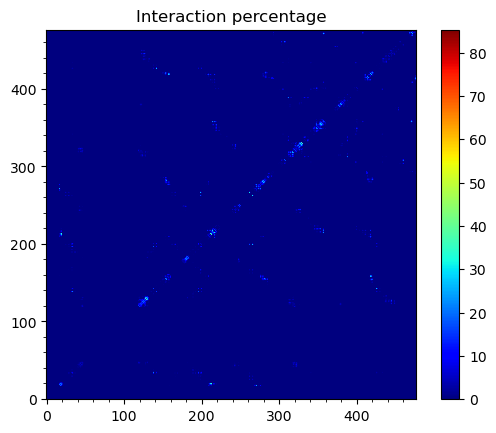

In [43]:
showWaterBridgeMatrix(analysisAtomic, 'percentage')

@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices


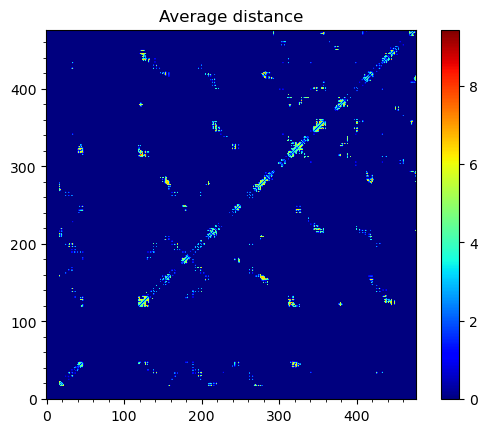

In [44]:
showWaterBridgeMatrix(analysisAtomic, 'distAvg')

@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices


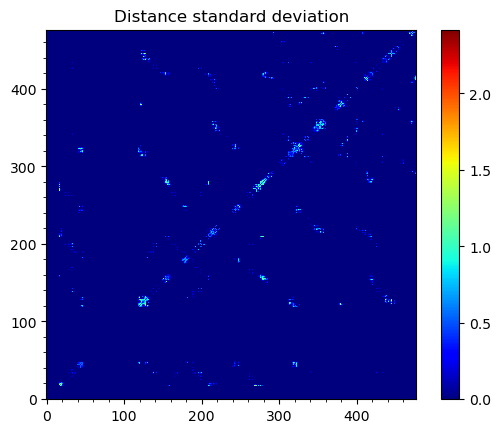

In [45]:
showWaterBridgeMatrix(analysisAtomic, 'distStd')

Raw data of the matrices can be obatined with 
:func:`.calcWaterBridgeMatrix`. The type of the matrix can be
selected among: *'percentage'*, *'distAvg'*, *'distStd'*.

### Statistical analysis for water bridges

To visualize the results in a more accessible way, we can use 
:func:`.calcWaterBridgeMatrix` function which will show how often
each residue were contributing to the water bridges in the trajectory.

In [46]:
calcBridgingResiduesHistogram(waterBridges)

[('PRO236P', 1),
 ('LEU335P', 1),
 ('PHE163P', 1),
 ('GLY440P', 1),
 ('PRO336P', 1),
 ('ILE294P', 1),
 ('ALA229P', 1),
 ('LEU409P', 1),
 ('SER300P', 1),
 ('GLY299P', 1),
 ('LEU28P', 1),
 ('TYR422P', 1),
 ('GLY226P', 1),
 ('GLY407P', 1),
 ('SER172P', 1),
 ('MET365P', 1),
 ('LEU228P', 1),
 ('ALA386P', 2),
 ('LEU289P', 2),
 ('MET453P', 2),
 ('ILE22P', 2),
 ('CYS302P', 2),
 ('PRO292P', 2),
 ('GLY203P', 2),
 ('ASN146P', 2),
 ('MET306P', 2),
 ('ILE443P', 3),
 ('LEU452P', 3),
 ('LEU186P', 3),
 ('GLY331P', 3),
 ('LEU134P', 3),
 ('ALA139P', 3),
 ('LEU30P', 3),
 ('MET204P', 3),
 ('GLY165P', 3),
 ('ILE174P', 3),
 ('THR38P', 3),
 ('GLY432P', 3),
 ('THR140P', 4),
 ('SER137P', 4),
 ('ALA309P', 4),
 ('VAL232P', 4),
 ('SER190P', 5),
 ('LEU288P', 5),
 ('GLY205P', 5),
 ('GLY195P', 5),
 ('GLY263P', 5),
 ('LEU233P', 5),
 ('ILE301P', 5),
 ('PHE429P', 5),
 ('PRO404P', 6),
 ('MET175P', 6),
 ('PRO272P', 6),
 ('LEU36P', 6),
 ('PRO159P', 7),
 ('PRO147P', 7),
 ('VAL259P', 7),
 ('PRO284P', 8),
 ('MET206P', 8),
 (

*clip* option can be used to include different number of results
on the histogram.

In [47]:
calcBridgingResiduesHistogram(waterBridges, clip=25)

[('PRO236P', 1),
 ('LEU335P', 1),
 ('PHE163P', 1),
 ('GLY440P', 1),
 ('PRO336P', 1),
 ('ILE294P', 1),
 ('ALA229P', 1),
 ('LEU409P', 1),
 ('SER300P', 1),
 ('GLY299P', 1),
 ('LEU28P', 1),
 ('TYR422P', 1),
 ('GLY226P', 1),
 ('GLY407P', 1),
 ('SER172P', 1),
 ('MET365P', 1),
 ('LEU228P', 1),
 ('ALA386P', 2),
 ('LEU289P', 2),
 ('MET453P', 2),
 ('ILE22P', 2),
 ('CYS302P', 2),
 ('PRO292P', 2),
 ('GLY203P', 2),
 ('ASN146P', 2),
 ('MET306P', 2),
 ('ILE443P', 3),
 ('LEU452P', 3),
 ('LEU186P', 3),
 ('GLY331P', 3),
 ('LEU134P', 3),
 ('ALA139P', 3),
 ('LEU30P', 3),
 ('MET204P', 3),
 ('GLY165P', 3),
 ('ILE174P', 3),
 ('THR38P', 3),
 ('GLY432P', 3),
 ('THR140P', 4),
 ('SER137P', 4),
 ('ALA309P', 4),
 ('VAL232P', 4),
 ('SER190P', 5),
 ('LEU288P', 5),
 ('GLY205P', 5),
 ('GLY195P', 5),
 ('GLY263P', 5),
 ('LEU233P', 5),
 ('ILE301P', 5),
 ('PHE429P', 5),
 ('PRO404P', 6),
 ('MET175P', 6),
 ('PRO272P', 6),
 ('LEU36P', 6),
 ('PRO159P', 7),
 ('PRO147P', 7),
 ('VAL259P', 7),
 ('PRO284P', 8),
 ('MET206P', 8),
 (

If we are interested in one particular residue, we can also use
:func:`.calcWaterBridgesDistribution` to find their partners in 
water bridges. Below we can see results for arginine 147 or 
aspartic acid 92 from chain P.

In [48]:
#calcWaterBridgesDistribution(waterBridges, 'ARG147P')

In [49]:
#calcWaterBridgesDistribution(waterBridges, 'ASP92P') 

Once we select a pair of residues which are supported by interactions
with water molecules we can use :func:`.calcWaterBridgesDistribution`
to obtain histograms with results such as distances between them 
*(metric='distance')*, the number of water molecules which were involved
*(metric='waters')*, and information about residue part which was involved
in water bridges, i.e. backbone or side chain *(metric='location')*. 

In [50]:
#calcWaterBridgesDistribution(waterBridges,  'ASP92P', 'ARG18P', trajectory=trajectory, metric='distance')

In [51]:
#calcWaterBridgesDistribution(waterBridges, 'ARG147P', 'GLN122P', metric='waters') 

In [52]:
#calcWaterBridgesDistribution(waterBridges, 'ARG147P', 'GLN122P', trajectory=trajectory, metric='location')

### Save results as PDB file

The results can be storage as PDB file using :func:`.savePDBWaterBridges` 
(single PDB file, single frame) or using :func:`.savePDBWaterBridgesTrajectory`
to save all the results (large number of frames saved each independently).

Those results can be displayed in any program for visualization. The results 
for protein structure will be storage in beta column (average values of 
contributions of each residue in water bridging) and occupancy column 
(results for particular frame). Water molecules will be included in each frame.

In [53]:
savePDBWaterBridges(waterBridges[0], coords_traj, PDBtraj_file[:-4]+'_frame0.pdb')

savePDBWaterBridgesTrajectory(waterBridges, coords_traj, filename=PDBtraj_file[:-4]+'_multi.pdb', trajectory=trajectory)

@> WARNING Resnums are exceeding 9999 and hexadecimal format is being used for resnums
@> WARNING Resnums are exceeding 9999 and hexadecimal format is being used for resnums
@> WARNING Resnums are exceeding 9999 and hexadecimal format is being used for resnums
@> WARNING Resnums are exceeding 9999 and hexadecimal format is being used for resnums
@> WARNING Resnums are exceeding 9999 and hexadecimal format is being used for resnums
@> WARNING Resnums are exceeding 9999 and hexadecimal format is being used for resnums
@> WARNING Resnums are exceeding 9999 and hexadecimal format is being used for resnums
@> WARNING Resnums are exceeding 9999 and hexadecimal format is being used for resnums
@> WARNING Resnums are exceeding 9999 and hexadecimal format is being used for resnums
@> WARNING Resnums are exceeding 9999 and hexadecimal format is being used for resnums
@> WARNING Resnums are exceeding 9999 and hexadecimal format is being used for resnums
@> WARNING Resnums are exceeding 9999 and h

@> WARNING Resnums are exceeding 9999 and hexadecimal format is being used for resnums
@> WARNING Resnums are exceeding 9999 and hexadecimal format is being used for resnums
@> WARNING Resnums are exceeding 9999 and hexadecimal format is being used for resnums
@> WARNING Resnums are exceeding 9999 and hexadecimal format is being used for resnums
@> WARNING Resnums are exceeding 9999 and hexadecimal format is being used for resnums
@> WARNING Resnums are exceeding 9999 and hexadecimal format is being used for resnums
@> WARNING Resnums are exceeding 9999 and hexadecimal format is being used for resnums
@> WARNING Resnums are exceeding 9999 and hexadecimal format is being used for resnums
@> WARNING Resnums are exceeding 9999 and hexadecimal format is being used for resnums
@> WARNING Resnums are exceeding 9999 and hexadecimal format is being used for resnums
@> WARNING Resnums are exceeding 9999 and hexadecimal format is being used for resnums
@> WARNING Resnums are exceeding 9999 and h

@> WARNING Resnums are exceeding 9999 and hexadecimal format is being used for resnums
@> WARNING Resnums are exceeding 9999 and hexadecimal format is being used for resnums
@> WARNING Resnums are exceeding 9999 and hexadecimal format is being used for resnums
@> WARNING Resnums are exceeding 9999 and hexadecimal format is being used for resnums
@> WARNING Resnums are exceeding 9999 and hexadecimal format is being used for resnums
@> WARNING Resnums are exceeding 9999 and hexadecimal format is being used for resnums
@> WARNING Resnums are exceeding 9999 and hexadecimal format is being used for resnums
@> WARNING Resnums are exceeding 9999 and hexadecimal format is being used for resnums
@> WARNING Resnums are exceeding 9999 and hexadecimal format is being used for resnums
@> WARNING Resnums are exceeding 9999 and hexadecimal format is being used for resnums
@> WARNING Resnums are exceeding 9999 and hexadecimal format is being used for resnums
@> WARNING Resnums are exceeding 9999 and h

### Detecting water centers

Previous function generated multiple PDB in which we would
found protein and water molecules for each frame that form
water bridges with protein structure. Now we can use another
function :func:`.findClusterCenters` which will extract 
water centers (they refer to the oxygens from water molecules
that are forming clusters). We need to provide a file pattern
as show below. Now all the files with prefix *'VMAT_multi_'*
will be analyzed.

In [54]:
findClusterCenters('VMAT_multi*.pdb', distC=0.35, numC=5)
!mv clusters_VMAT_multi.pdb 035_5_clusters_wb_default.pdb

@> 6028 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6157 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6268 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6310 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6334 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6307 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6253 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6277 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6289 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6319 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6268 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6228 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6325 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6244 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6355 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6292 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6298 atoms and 1 coordinate set(s) we

@> 6265 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6316 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6211 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6304 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6259 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6286 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6262 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6226 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6235 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6280 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6289 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6262 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6271 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6274 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6313 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6235 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6235 atoms and 1 coordinate set(s) we

In [55]:
findClusterCenters('VMAT_multi*.pdb')
!mv clusters_VMAT_multi.pdb clusters_wb_default.pdb

@> 6028 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6157 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6268 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6310 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6334 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6307 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6253 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6277 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6289 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6319 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6268 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6228 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6325 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6244 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6355 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6292 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6298 atoms and 1 coordinate set(s) we

@> 6265 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6316 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6211 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6304 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6259 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6286 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6262 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6226 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6235 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6280 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6289 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6262 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6271 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6274 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6313 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6235 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6235 atoms and 1 coordinate set(s) we

Function generated one PDB file with water centers.
We used default values, such as distC (distance to other molecule)
and numC (min number of molecules in a cluster), but 
those values could be changed if the molecules are more widely 
distributed or we would like to have more numerous clusters.
Moreover, this function can be applied on different type of molecules
by using *selection* paramater. We can provide the whole molecule 
and by default the center of mass will be used as a reference.

In [56]:
findClusterCenters('VMAT_multi*.pdb', distC=0.2, numC=5)
!mv clusters_VMAT_multi.pdb 02_05_clusters_wb_default.pdb

@> 6028 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6157 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6268 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6310 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6334 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6307 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6253 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6277 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6289 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6319 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6268 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6228 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6325 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6244 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6355 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6292 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6298 atoms and 1 coordinate set(s) we

@> 6265 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6316 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6211 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6304 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6259 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6286 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6262 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6226 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6235 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6280 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6289 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6262 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6271 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6274 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6313 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6235 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6235 atoms and 1 coordinate set(s) we

In [57]:
findClusterCenters('VMAT_multi*.pdb', distC=0.2, numC=10)
!mv clusters_VMAT_multi.pdb 02_10_clusters_wb_default.pdb

@> 6028 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6157 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6268 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6310 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6334 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6307 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6253 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6277 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6289 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6319 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6268 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6228 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6325 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6244 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6355 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6292 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6298 atoms and 1 coordinate set(s) we

@> 6265 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6316 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6211 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6304 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6259 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6286 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6262 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6226 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6235 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6280 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6289 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6262 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6271 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6274 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6313 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6235 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6235 atoms and 1 coordinate set(s) we

In [58]:
findClusterCenters('VMAT_multi*.pdb', distC=0.3, numC=10)
!mv clusters_VMAT_multi.pdb 03_10_clusters_wb_default.pdb

@> 6028 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6157 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6268 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6310 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6334 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6307 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6253 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6277 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6289 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6319 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6268 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6228 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6325 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6244 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6355 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6292 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6298 atoms and 1 coordinate set(s) we

@> 6265 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6316 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6211 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6304 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6259 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6286 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6262 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6226 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6235 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6280 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6289 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6262 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6271 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6274 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6313 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6235 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6235 atoms and 1 coordinate set(s) we

In [59]:
findClusterCenters('VMAT_multi*.pdb', distC=0.35, numC=10)
!mv clusters_VMAT_multi.pdb 035_10_clusters_wb_default.pdb

@> 6028 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6157 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6268 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6310 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6334 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6307 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6253 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6277 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6289 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6319 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6268 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6228 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6325 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6244 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6355 atoms and 1 coordinate set(s) were parsed in 0.08s.
@> 6292 atoms and 1 coordinate set(s) were parsed in 0.08s.
@> 6298 atoms and 1 coordinate set(s) we

@> 6265 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6316 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6211 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6304 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6259 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6286 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6262 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6226 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6235 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6280 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6289 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6262 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6271 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6274 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6313 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6235 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6235 atoms and 1 coordinate set(s) we

In [60]:
findClusterCenters('VMAT_multi*.pdb', distC=0.35, numC=15)
!mv clusters_VMAT_multi.pdb 035_15_clusters_wb_default.pdb

@> 6028 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6157 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6268 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6310 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6334 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6307 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6253 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6277 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6289 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6319 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6268 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6228 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6325 atoms and 1 coordinate set(s) were parsed in 0.08s.
@> 6244 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6355 atoms and 1 coordinate set(s) were parsed in 0.08s.
@> 6292 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6298 atoms and 1 coordinate set(s) we

@> 6265 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6316 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6211 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6304 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6259 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6286 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6262 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6226 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6235 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6280 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6289 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6262 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6271 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6274 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6313 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6235 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6235 atoms and 1 coordinate set(s) we

In [61]:
findClusterCenters('VMAT_multi*.pdb', distC=0.4, numC=15)
!mv clusters_VMAT_multi.pdb 04_15_clusters_wb_default.pdb

@> 6028 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6157 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6268 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6310 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6334 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6307 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6253 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6277 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6289 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6319 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6268 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6228 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6325 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6244 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6355 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6292 atoms and 1 coordinate set(s) were parsed in 0.08s.
@> 6298 atoms and 1 coordinate set(s) we

@> 6265 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6316 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6211 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6304 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6259 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6286 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6262 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6226 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6235 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6280 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6289 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6262 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6271 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6274 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6313 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6235 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6235 atoms and 1 coordinate set(s) we

In [62]:
findClusterCenters('VMAT_multi*.pdb', distC=0.5, numC=15)
!mv clusters_VMAT_multi.pdb 05_15_clusters_wb_default.pdb

@> 6028 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6157 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6268 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6310 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6334 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6307 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6253 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6277 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6289 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6319 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6268 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6228 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6325 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6244 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6355 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6292 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6298 atoms and 1 coordinate set(s) we

@> 6265 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6316 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6211 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6304 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6259 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6286 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6262 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6226 atoms and 1 coordinate set(s) were parsed in 0.08s.
@> 6235 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6280 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6289 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6262 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6271 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6274 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6313 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6235 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6235 atoms and 1 coordinate set(s) we

In [63]:
findClusterCenters('VMAT_multi*.pdb', distC=0.5, numC=20)
!mv clusters_VMAT_multi.pdb 05_20_clusters_wb_default.pdb

@> 6028 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6157 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6268 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6310 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6334 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6307 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6253 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6277 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6289 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6319 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6268 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6228 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6325 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6244 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6355 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6292 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6298 atoms and 1 coordinate set(s) we

@> 6265 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6316 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6211 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6304 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6259 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6286 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6262 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6226 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6235 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6280 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6289 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6262 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6271 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6274 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6313 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6235 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6235 atoms and 1 coordinate set(s) we

In [64]:
findClusterCenters('VMAT_multi*.pdb', distC=0.7, numC=20)
!mv clusters_VMAT_multi.pdb 07_20_clusters_wb_default.pdb

@> 6028 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6157 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6268 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6310 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6334 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6307 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6253 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6277 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6289 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6319 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6268 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6228 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6325 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6244 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6355 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6292 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6298 atoms and 1 coordinate set(s) we

@> 6265 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6316 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6211 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6304 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6259 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6286 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6262 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6226 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6235 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6280 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6289 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6262 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6271 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6274 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6313 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 6235 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 6235 atoms and 1 coordinate set(s) we